trying to calculate required sample size by resampling. this is 7a approvals. NOTE this is not a representative sample since pps and strata are used. this matters right? i imagine that for this type of resampling to give reasonable results, the sample one is resampling from must be representative.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline

In [2]:
improper_sample = pd.read_excel('7A_Approval_Improper.xls')
population = pd.read_excel('7a_approval_pop.xlsx')

In [3]:
improper_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
Loan Number                 141 non-null int64
Loan Name                   141 non-null object
FIRS                        141 non-null object
Improper Payment            141 non-null object
Improper Payment Amount     141 non-null float64
Overpayment/Underpayment    10 non-null object
Appropriate Action          10 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ KB


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56378 entries, 0 to 5398
Data columns (total 5 columns):
LoanNmb           56378 non-null int64
BorrowerNm        56373 non-null object
NetApprovalAmt    56378 non-null float64
NetGtyAmt         56378 non-null float64
delivery_mtd      56378 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 2.6+ MB


calculate the margin of error, or the amount of probability that the middle 90% of sampling distribution must contain. the MOE is 2.5% of average guaranteed amount.

In [5]:
average_gty_size = population['NetGtyAmt'].sum()/len(population.index)
margin_of_error = .025 * average_gty_size

resample from improper payment sample and take average of sample. do this over and over in order to generate sampling distribution of mean improper payment

given a starting sample of X size, how large of resampling samples can be drawn?

In [23]:
num_simulations = 1000
sim_averages = []
sample_size = len(improper_sample.index)
sample_size = 2500

for _ in range(num_simulations):
    improper_sim = np.random.choice(improper_sample['Improper Payment Amount'], size=sample_size)
    sim_averages.append(np.mean(improper_sim)) 

In [24]:
five_percentile = np.percentile(sim_averages, 5)
ninety_five_percentile = np.percentile(sim_averages, 95)
middle_ninety = ninety_five_percentile - five_percentile
print(five_percentile, ninety_five_percentile)

(36587.883349999996, 51755.269500000002)


In [25]:
print(2*margin_of_error, middle_ninety, 2*margin_of_error > middle_ninety)

(13445.39203056157, 15167.386150000006, False)


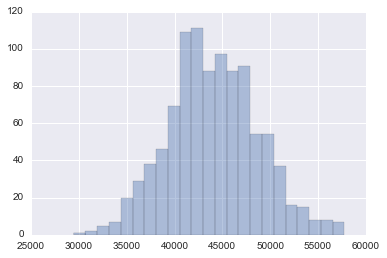

In [26]:
sns.distplot(sim_averages, kde=False)